In [4]:


import numpy as np
import matplotlib.pyplot as plt
import os
import json
import random



################# PARAMETERS TO CHANGE ####################
dataset_folder = '/users/Acer/.arc/cache/dataset/sort_of_ARC_testing/'
verbose = True



#total number of puzzles (meta samples)
dataset_size = 10

#number of training boards and testing boards
meta_trn_size = 5 # 5 is the default of the paper; 0 for random between 2 and 7
meta_tst_size = 1
 
plot_items = 3 # number of puzzles to plot

#look at figure 4 in the paper for understanding what this is
#seemingly they dont generate using all possible combinations
#although I am not 100% sure how they generate figure 4, talk to me (Jammy) to discuss further
#I think they basically use 'sparse_rule'

rule_matrix_style = 'sparse_rule'
#rule_matrix_style = 'uniform_rule'

# -1 for grid size for random
all_items_same_grid_size = False  # only applies if grid_size is -1
grid_size_width = 20
grid_size_height = 20
min_grid_size = 8 # applies if grid_size is -1



In [5]:

from genDSL_helpers import plot_riddle
from sort_of_arc_generation_script import generate_random_SortOfARC_puzzle



PUZZLE #1


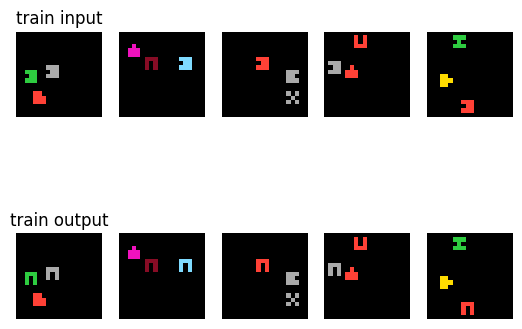



PUZZLE #2


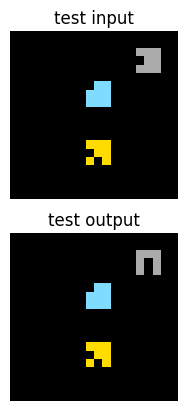

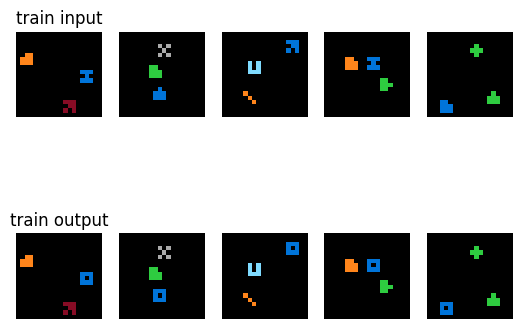



PUZZLE #3


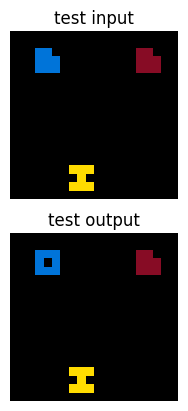

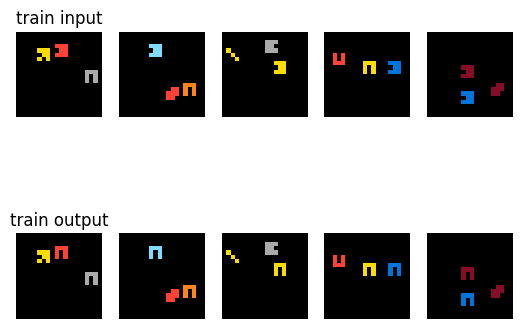



PUZZLE #4


PUZZLE #5


PUZZLE #6


PUZZLE #7


PUZZLE #8


PUZZLE #9


PUZZLE #10


dataset generated


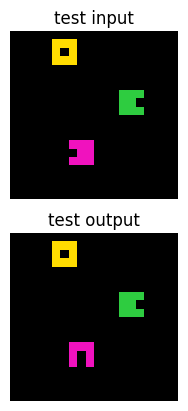

In [6]:
#adap
plotted = 0
for n in range(dataset_size):
    if verbose:
        print("PUZZLE #"+str(n+1))
    #generate_random_SortOfARC_puzzle(rule_matrix_style='sparse_rule', meta_trn_size = 5, meta_tst_size = 1, grid_width=20, grid_height=20, min_grid_size=8, all_items_same_grid_size=True, verbose=True):
    train_input_boards, train_output_boards, test_input_boards, test_output_boards = generate_random_SortOfARC_puzzle(rule_matrix_style=rule_matrix_style, meta_trn_size=meta_trn_size, meta_tst_size=meta_tst_size, grid_width=grid_size_width, grid_height=grid_size_height, min_grid_size=min_grid_size, all_items_same_grid_size=all_items_same_grid_size, verbose=verbose if plotted<plot_items else False)
    plotted+=1
    json_obj = {}
    json_obj['train'] = []
    json_obj['test'] = []
    # train
    for i in range(len(train_input_boards)):
        a = {
            'input': train_input_boards[i].tolist(),
            'output': train_output_boards[i].tolist()
        }
        json_obj['train'].append(a)

    a = {'input': test_input_boards[0].tolist(), 'output': test_output_boards[0].tolist()}
    json_obj['test'].append(a)


    # verify folder exists ./dungeon_dataset/
    if not os.path.exists(dataset_folder):
        os.makedirs(dataset_folder)
    #make a new filename that is 8 characters long and represents a random hex number
    # characters betwee 0-9 and a-f
    string = '0123456789abcdef'
    filename = ''.join(random.choice(string) for i in range(8)) + '.json'
    # write the json object to a file
    with open(f"{dataset_folder}{filename}", 'w') as outfile:
        json.dump(json_obj, outfile)
    
    if verbose:
        print()
        print()

print('dataset generated')